<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/Meteorology_replace-missing-values/blob/master/Replace_Missing_Values_Temperature%5BCuritiba%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Leitura de dados
dataSet = pd.read_csv("https://github.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/raw/master/DadosDiarios/curitibadiario.csv",
                      sep=';',skiprows=16)

In [0]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [4]:
#Descrevendo base de dados
dataSet.describe()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
count,26262.0,26262.000000,13122.000000,13092.000000,13111.000000,12882.000000,12367.000000,13077.000000,13016.000000,13114.000000,0.0
mean,83842.0,600.091387,4.268648,23.547426,13.558195,5.089730,2.285712,17.526644,80.803242,2.183913,NaN
std,0.0,600.011417,10.471597,4.671269,4.052985,3.610441,1.419244,3.875246,9.479680,0.830833,NaN
min,83842.0,0.000000,0.000000,7.100000,-3.500000,0.000000,0.000000,3.300000,0.000000,0.000000,NaN
25%,83842.0,0.000000,0.000000,20.300000,11.000000,1.500000,1.300000,14.900000,75.750000,1.633333,NaN
50%,83842.0,1200.000000,0.000000,23.900000,14.000000,5.400000,2.000000,17.820000,82.000000,2.100000,NaN
75%,83842.0,1200.000000,2.500000,27.200000,16.700000,8.300000,3.000000,20.520000,87.500000,2.633333,NaN
max,83842.0,1200.000000,146.200000,35.200000,22.600000,12.800000,12.500000,27.380000,99.250000,7.366667,NaN


In [5]:
#Verificando dados
dataSet.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83842,1980-01-01,0,NaN,24.6,NaN,11.7,7.4,15.94,69.25,3.366667,NaN
1,83842,1980-01-01,1200,0.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,83842,1980-01-02,0,NaN,25.0,NaN,8.1,1.9,16.52,76.75,1.700000,NaN
3,83842,1980-01-02,1200,0.0,NaN,11.7,NaN,NaN,NaN,NaN,NaN,NaN
4,83842,1980-01-03,0,NaN,27.1,NaN,11.2,2.9,18.92,71.00,1.833333,NaN


In [0]:
#Atribuindo "Data" como índice para a base de dados
dataSet = dataSet.set_index("Data")

In [0]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [0]:
#Descartando as colunas "Hora", "Estacao" e "Unnamed: 11" 
dataSet00, dataSet12 = dataSet00.drop(columns = ["Hora", "Estacao", "Unnamed: 11"]), dataSet12.drop(columns = ["Hora", "Estacao", "Unnamed: 11"])

In [9]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,0.0,13092.000000,0.0,12882.000000,12367.000000,13077.000000,13016.000000,13114.000000
mean,NaN,23.547426,NaN,5.089730,2.285712,17.526644,80.803242,2.183913
std,NaN,4.671269,NaN,3.610441,1.419244,3.875246,9.479680,0.830833
min,NaN,7.100000,NaN,0.000000,0.000000,3.300000,0.000000,0.000000
25%,NaN,20.300000,NaN,1.500000,1.300000,14.900000,75.750000,1.633333
50%,NaN,23.900000,NaN,5.400000,2.000000,17.820000,82.000000,2.100000
75%,NaN,27.200000,NaN,8.300000,3.000000,20.520000,87.500000,2.633333
max,NaN,35.200000,NaN,12.800000,12.500000,27.380000,99.250000,7.366667


In [10]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,13122.000000,0.0,13111.000000,0.0,0.0,0.0,0.0,0.0
mean,4.268648,NaN,13.558195,NaN,NaN,NaN,NaN,NaN
std,10.471597,NaN,4.052985,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,-3.500000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN
75%,2.500000,NaN,16.700000,NaN,NaN,NaN,NaN,NaN
max,146.200000,NaN,22.600000,NaN,NaN,NaN,NaN,NaN


In [0]:
#Eliminando colunas completas por "NaN" em cada uma das bases de dados
dataSet00 = dataSet00.drop(columns = ["Precipitacao","TempMinima"])
dataSet12 = dataSet12.drop(columns = ["TempMaxima","Insolacao","Evaporacao Piche","Temp Comp Media","Umidade Relativa Media","Velocidade do Vento Media"])

In [12]:
#Exibindo a base de dados recém filtrada para 00:00 h
dataSet00.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,
1980-01-01,24.6,11.7,7.4,15.94,69.25,3.366667
1980-01-02,25.0,8.1,1.9,16.52,76.75,1.700000
1980-01-03,27.1,11.2,2.9,18.92,71.00,1.833333
1980-01-04,27.4,11.2,5.3,18.86,66.25,2.700000
1980-01-05,23.8,12.3,3.2,17.78,73.00,4.500000


In [13]:
#Exibindo a base de dados recém filtrada para 12:00 h
dataSet12.head()

,Precipitacao,TempMinima
Data,,
1980-01-01,0.0,9.0
1980-01-02,0.0,11.7
1980-01-03,0.0,14.1
1980-01-04,0.0,12.8
1980-01-05,0.0,13.6


In [0]:
#Criando o intervalo completo de tempo de 01-01-1980 à 31-12-2017
dataInicial = '1980-01-01'
dataFinal = '2017-12-31'
tempo = pd.date_range(dataInicial, dataFinal)
#Atribuindo este intervalo de tempo à um dataSet provisório
dataSetProv = pd.DataFrame()
dataSetProv["Data"] = tempo

In [0]:
#Atribuindo o índice para o dataSet provisório como sendo a coluna de datas
dataSetProv = dataSetProv.set_index("Data")

In [16]:
#Visualizando o dataSet provisório
dataSetProv.head()

""
Data
1980-01-01
1980-01-02
1980-01-03
1980-01-04
1980-01-05


In [0]:
#Mesclando o dataSet provisório como sendo o resultado da junção dos dataSet00 e dataSet12
dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)

In [18]:
#Mostrando o resultado da junção
dataSetProv.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,24.6,11.7,7.4,15.94,69.25,3.366667,0.0,9.0
1980-01-02,25.0,8.1,1.9,16.52,76.75,1.700000,0.0,11.7
1980-01-03,27.1,11.2,2.9,18.92,71.00,1.833333,0.0,14.1
1980-01-04,27.4,11.2,5.3,18.86,66.25,2.700000,0.0,12.8
1980-01-05,23.8,12.3,3.2,17.78,73.00,4.500000,0.0,13.6


In [19]:
#Quantidade de dias existentes na base de dados
len(dataSetProv)

13880

In [0]:
#Tornando o dataSet como sendo o dataSet provisório
dataSet = dataSetProv

In [21]:
#Descrevendo o novo dataSet
dataSet.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,13092.000000,12882.000000,12367.000000,13077.000000,13016.000000,13114.000000,13122.000000,13111.000000
mean,23.547426,5.089730,2.285712,17.526644,80.803242,2.183913,4.268648,13.558195
std,4.671269,3.610441,1.419244,3.875246,9.479680,0.830833,10.471597,4.052985
min,7.100000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,-3.500000
25%,20.300000,1.500000,1.300000,14.900000,75.750000,1.633333,0.000000,11.000000
50%,23.900000,5.400000,2.000000,17.820000,82.000000,2.100000,0.000000,14.000000
75%,27.200000,8.300000,3.000000,20.520000,87.500000,2.633333,2.500000,16.700000
max,35.200000,12.800000,12.500000,27.380000,99.250000,7.366667,146.200000,22.600000


In [22]:
#Mostrando o cabeçalho do novo dataSet
dataSet.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,24.6,11.7,7.4,15.94,69.25,3.366667,0.0,9.0
1980-01-02,25.0,8.1,1.9,16.52,76.75,1.700000,0.0,11.7
1980-01-03,27.1,11.2,2.9,18.92,71.00,1.833333,0.0,14.1
1980-01-04,27.4,11.2,5.3,18.86,66.25,2.700000,0.0,12.8
1980-01-05,23.8,12.3,3.2,17.78,73.00,4.500000,0.0,13.6


# Modelagem para previsão de Temperatura Máxima

In [0]:
#Separando base de dados para treino de rede neural para previsão de temperatura máxima
dataTreinoTempMax = dataSet.dropna(subset = ["TempMaxima"])

In [0]:
#Separando a variável que será prevista, TempMaxima, da base de dados
tempMax = dataTreinoTempMax["TempMaxima"]
dataTreinoTempMax = dataTreinoTempMax.drop(columns = "TempMaxima")

In [25]:
#Visualizando cabeçalho dos dados para treino
dataTreinoTempMax.head()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,
1980-01-01,11.7,7.4,15.94,69.25,3.366667,0.0,9.0
1980-01-02,8.1,1.9,16.52,76.75,1.700000,0.0,11.7
1980-01-03,11.2,2.9,18.92,71.00,1.833333,0.0,14.1
1980-01-04,11.2,5.3,18.86,66.25,2.700000,0.0,12.8
1980-01-05,12.3,3.2,17.78,73.00,4.500000,0.0,13.6


In [26]:
#Visualizando cabeçalho das informações de temperatura 
tempMax.head()

Data
1980-01-01    24.6
1980-01-02    25.0
1980-01-03    27.1
1980-01-04    27.4
1980-01-05    23.8
Name: TempMaxima, dtype: float64

In [0]:
#Guardando a informação de como as colunas estão distribuídas no dataFrame
colunas = dataTreinoTempMax.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMax = mms.fit_transform(dataTreinoTempMax)

In [29]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMax)
prov.columns = colunas
prov.describe()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,12861.000000,12364.000000,13075.000000,12994.000000,13077.000000,13070.000000,13075.000000
mean,-0.204884,-0.634311,0.181630,0.628305,-0.406976,-0.941574,0.307435
std,0.564343,0.227079,0.321886,0.191075,0.225296,0.143162,0.310806
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.765625,-0.792000,-0.036545,0.526448,-0.556561,-1.000000,0.111111
50%,-0.156250,-0.680000,0.205980,0.652393,-0.429864,-1.000000,0.340996
75%,0.296875,-0.520000,0.430233,0.763224,-0.285068,-0.965800,0.547893
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0 
dataTreinoTempMax = np.nan_to_num(dataTreinoTempMax, copy = False)

In [31]:
#Verificando dimensões do dataSet
print(dataTreinoTempMax.shape)

(13092, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMax, X_testTempMax, Y_trainTempMax, Y_testTempMax = train_test_split(dataTreinoTempMax, tempMax, test_size = 0.1, random_state = 9)

In [0]:
#Definindo uma função para criar a MLP
def trainMLP(optimizer='adam', init='random_uniform', units = 7, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMax = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [38]:
#Busca pelos melhores parâmetros
grid_resultTempMax = grid_searchTempMax.fit(X_trainTempMax, Y_trainTempMax)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 1s - loss: 393.7957 - mean_absolute_error: 19.1364
Epoch 2/200
 - 1s - loss: 182.4598 - mean_absolute_error: 12.5886
Epoch 3/200
 - 1s - loss: 80.7782 - mean_absolute_error: 7.8677
Epoch 4/200
 - 1s - loss: 37.2829 - mean_absolute_error: 5.1383
Epoch 5/200
 - 1s - loss: 24.1191 - mean_absolute_error: 4.0949
Epoch 6/200
 - 1s - loss: 21.9470 - mean_absolute_error: 3.8697
Epoch 7/200
 - 1s - loss: 21.7525 - mean_absolute_error: 3.8395
Epoch 8/200
 - 1s - loss: 14.7324 - mean_absolute_error: 3.0774
Epoch 9/200
 - 1s - loss: 4.6344 - mean_absolute_error: 1.6620
Epoch 10/200
 - 1s - loss: 2.5166 - mean_absolute_error: 1.2209
Epoch 11/200
 - 1s - loss:

In [39]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMax.best_score_, grid_resultTempMax.best_params_))
means = grid_resultTempMax.cv_results_['mean_test_score']
stds = grid_resultTempMax.cv_results_['std_test_score']
params = grid_resultTempMax.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.305979, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.305979 (0.041729) {'batch_size': 10, 'camadas': 2, 'units': 7}


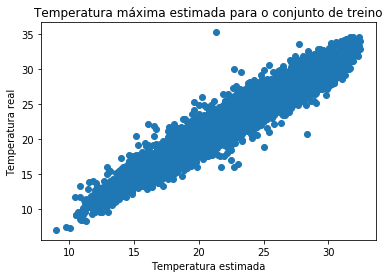

In [40]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax)
plt.title("Temperatura máxima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [41]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax))

[[1.        0.9698341]
 [0.9698341 1.       ]]


In [0]:
#Previsão com base no resultado da Grid Search
Y_predTempMax = grid_searchTempMax.predict(X_testTempMax)

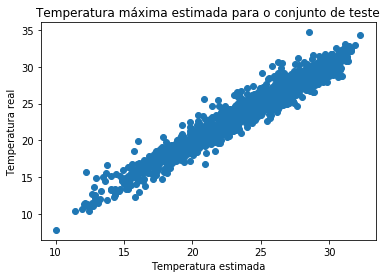

In [43]:
#Gráfico que mostra a relação entre a temperatura máxima real e a prevista para o conjunto de teste
plt.scatter(Y_predTempMax, Y_testTempMax)
plt.title("Temperatura máxima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [44]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMax, Y_testTempMax))

[[1.         0.97019346]
 [0.97019346 1.        ]]


In [45]:
#Erro absoluto médio entre a temperatura máxima prevista e a real
print(mean_absolute_error(Y_testTempMax, Y_predTempMax))

0.9021444873955413


In [46]:
#Erro quadrático médio entre a temperatura máxima prevista e a real
print(mean_squared_error(Y_testTempMax, Y_predTempMax))

1.3540637641808735


# Modelagem para previsão de Temperatura Mínima

In [0]:
#Separando dados para treinar rede neural para previsão de temperatura mínima
dataTreinoTempMin = dataSet.dropna(subset = ["TempMinima"])

In [0]:
#Separando a variável que será prevista, TempMinima, da base de dados
tempMin = dataTreinoTempMin["TempMinima"]
dataTreinoTempMin = dataTreinoTempMin.drop(columns = "TempMinima")

In [49]:
#Visualizando dados de treino para temperatura mínima
dataTreinoTempMin.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
Data,,,,,,,
1980-01-01,24.6,11.7,7.4,15.94,69.25,3.366667,0.0
1980-01-02,25.0,8.1,1.9,16.52,76.75,1.700000,0.0
1980-01-03,27.1,11.2,2.9,18.92,71.00,1.833333,0.0
1980-01-04,27.4,11.2,5.3,18.86,66.25,2.700000,0.0
1980-01-05,23.8,12.3,3.2,17.78,73.00,4.500000,0.0


In [50]:
#Visualizando informações de temperatura mínima para cada um dos dados de treino 
tempMin.head()

Data
1980-01-01     9.0
1980-01-02    11.7
1980-01-03    14.1
1980-01-04    12.8
1980-01-05    13.6
Name: TempMinima, dtype: float64

In [0]:
#Guardando informação de como as colunas estão distribuídas no dataFrame 
colunas = dataTreinoTempMin.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMin = mms.fit_transform(dataTreinoTempMin)

In [53]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMin)
prov.columns = colunas
prov.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
count,13075.000000,12881.000000,12366.000000,13076.000000,13015.000000,13098.000000,13100.000000
mean,0.192121,-0.204714,-0.634285,0.181593,0.628262,-0.407335,-0.941507
std,0.338406,0.564150,0.227088,0.321867,0.191026,0.225410,0.143351
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.043478,-0.765625,-0.792000,-0.036545,0.526448,-0.556561,-1.000000
50%,0.217391,-0.156250,-0.680000,0.205980,0.652393,-0.429864,-1.000000
75%,0.456522,0.296875,-0.520000,0.430233,0.763224,-0.285068,-0.964432
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0
dataTreinoTempMin = np.nan_to_num(dataTreinoTempMin, copy = False)

In [55]:
#Verificando dimensões do dataSet
print(dataTreinoTempMin.shape)

(13111, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMin, X_testTempMin, Y_trainTempMin, Y_testTempMin = train_test_split(dataTreinoTempMin, tempMin, test_size = 0.1, random_state = 9)

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMin = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [61]:
#Busca pelos melhores parâmetros
grid_resultTempMin = grid_searchTempMin.fit(X_trainTempMin, Y_trainTempMin)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Epoch 1/200
 - 1s - loss: 107.2303 - mean_absolute_error: 9.4369
Epoch 2/200
 - 1s - loss: 32.0163 - mean_absolute_error: 4.8044
Epoch 3/200
 - 1s - loss: 16.0794 - mean_absolute_error: 3.2874
Epoch 4/200
 - 1s - loss: 6.9021 - mean_absolute_error: 2.0986
Epoch 5/200
 - 1s - loss: 3.3891 - mean_absolute_error: 1.4510
Epoch 6/200
 - 1s - loss: 2.0504 - mean_absolute_error: 1.1201
Epoch 7/200
 - 1s - loss: 1.7328 - mean_absolute_error: 1.0255
Epoch 8/200
 - 1s - loss: 1.5844 - mean_absolute_error: 0.9787
Epoch 9/200
 - 1s - loss: 1.4817 - mean_absolute_error: 0.9421
Epoch 10/200
 - 1s - loss: 1.4239 - mean_absolute_error: 0.9203
Epoch 11/200
 - 1s - loss: 1.3914 - mean_absolute_error: 0.9100
Epoch 12/200
 - 1s - loss: 1.3620 - mean_absolute_error: 0.8968
Epoch 13/200
 - 1s - loss:

In [62]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMin.best_score_, grid_resultTempMin.best_params_))
means = grid_resultTempMin.cv_results_['mean_test_score']
stds = grid_resultTempMin.cv_results_['std_test_score']
params = grid_resultTempMin.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.100217, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.100217 (0.062219) {'batch_size': 10, 'camadas': 2, 'units': 7}


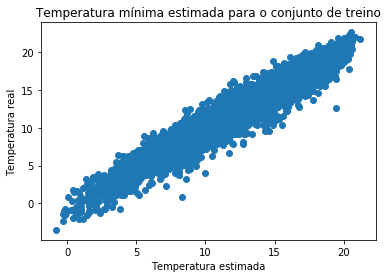

In [63]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin)
plt.title("Temperatura mínima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [64]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin))

[[1.         0.96758499]
 [0.96758499 1.        ]]


In [0]:
#Previsão para os dados de teste a partir da modelagem obtida
Y_predTempMin = grid_searchTempMin.predict(X_testTempMin)

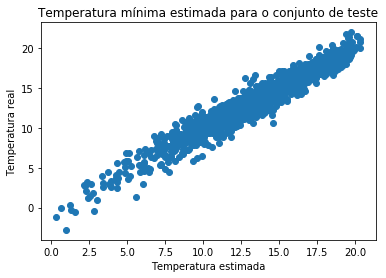

In [66]:
#Gráfico que mostra a relação entre a temperatura mínima real e a temperatura mínima prevista para os dados de teste
plt.scatter(Y_predTempMin, Y_testTempMin)
plt.title("Temperatura mínima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [67]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMin, Y_testTempMin))

[[1.         0.96930763]
 [0.96930763 1.        ]]


In [68]:
#Erro absoluto médio entre temperatura mínima real e prevista para os dados de teste
print(mean_absolute_error(Y_testTempMin, Y_predTempMin))

0.771475451675857


In [69]:
#Erro quadrático médio entre a temperatura mínima real e a prevista para os dados de teste
print(mean_squared_error(Y_testTempMin, Y_predTempMin))

0.99398339634689


In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pickle
# Salvando os modelos treinados
filename = '/content/gdrive/My Drive/TemperaturaMaximaCuritiba.sav'
pickle.dump(grid_searchTempMax, open(filename, 'wb'))

In [0]:
filename = '/content/gdrive/My Drive/TemperaturaMinimaCuritiba.sav'
pickle.dump(grid_searchTempMin, open(filename, 'wb'))